In [2]:
import datetime

In [31]:
filename = "chat.txt"
my_handle = "BD"#my whatsapp handle
sendert = "someone"#enter the sender name, as per their whatsapp handles
d = datetime.datetime(19,10,13,0,0,0)#YY,MM,DD,0,0,0 - this is the date of one day before the first chat

In [5]:
file = open(filename,"r+")
lines = file.readlines()

In [6]:
datest = []

In [7]:
messagedata = []

In [8]:
ctr = 0

# Seperating the chats in an organized way

In [63]:
for line in lines:
    
    in1 = line.find(",")
    in2 = line.find("-")
    in3 = line.find(":",in2+1)
    date = str(line[:in1]).strip()
    time = str(line[in1+1:in2]).strip()
    sender = str(line[in2+1:in3]).strip()
    msg = str(line[in3+1:]).strip()
    
    if '<media omitted>' in msg.lower():
        continue
    
    tmpdata = [date,time,sender,msg]
    
    messagedata.append(tmpdata)
    
    # multiple line messages will have meaningless data, but that is solved later on
    

# Check if the data was properly formatted

In [ ]:
print(messagedata[-5:])

# Function to convert into a date object which can be processed by datetime imported earlier

In [13]:
def dtobj(data):
    date = data[0]
    time = data[1]
    
    #print(date,time)
    
    din1 = date.find("/")
    din2 = date.find("/",din1+1)
    
    month = int(str(date[:din1]))
    day = int(str(date[din1+1:din2]))
    year = int(date[din2+1:])
    
    tin1 = time.find(":")
    tin2 = time.find(" ")
    
    hour = int(time[:tin1])
    minute = int(time[tin1+1:tin2])
    
    
    
    if time[-2]=='P' and hour!=12:
        hour+=12
    
    
    #print(month)
    
    if(time[-2]=='A' and hour==12):
        hour = 0
    
    return datetime.datetime(year,month,day,hour,minute,0,0)


# Calculating the number of messages per day

In [34]:

ctr=0


tmp = 1
prev = 0
datest = []

tmpp = 1
prevp = 0
datestp = []
for index in range(len(messagedata)-1):
    try:
        #print (index)

        data1 = messagedata[index]
        data2 = messagedata[index+1]
        d1 = dtobj(data1)
        d2 = dtobj(data2)

        diff = d2-d1 # getting date oobject between two consecutive messages
        
        secs = diff.total_seconds()
        
            
        daysp = (d2-d).days # number of days lapsed since the first chat of the file

        if data2[2]==sendert: # checking if the message is from the sender


            if daysp==prevp: #if we're on the same day as the last message increment the number of messages
                tmpp+=1



        elif data2[2] == my_handle:# same as above
            if daysp==prevp:
                tmp+=1

                    
        if daysp!=prevp: # if we progress to the next day then we put the counters to 1 as one message has been overlooked
            #in the last block, 
            datestp.append(tmpp)
            tmpp = 1
            prevp = daysp
            datest.append(tmp)
            tmp = 1
                
                
    except Exception as e:
        #print(e)
        ctr+=1
    

In [35]:
print(ctr)# print number of illegaly formatted list

1726


# Calculating the number of convos initiated per day

In [38]:
me = 0
them = 0
ctr=0
prevday = d


convoinitbythem = []
convoinitbyme = []

for index in range(len(messagedata)-1):
    try:
        #print (index)

        data1 = messagedata[index]
        data2 = messagedata[index+1]
        d1 = dtobj(data1)
        d2 = dtobj(data2)

        diff = d2-d1

        secs = diff.total_seconds()
        
        
        currday = (d2-d).days
        
        if secs>5400:# check if time between two messages is greater than 1.5 hrs, if yes, it is considered as a conversation initiation
            if data2[2]==sendert:
                them += 1
            else:
                me += 1
                
        if prevday!=currday:
            convoinitbythem.append(them)
            them = 0
            convoinitbyme.append(me)
            me = 0
            prevday=currday
            
    except Exception as e:
        ctr+=1
    

# Plotting the graph of number of messages per day by each user

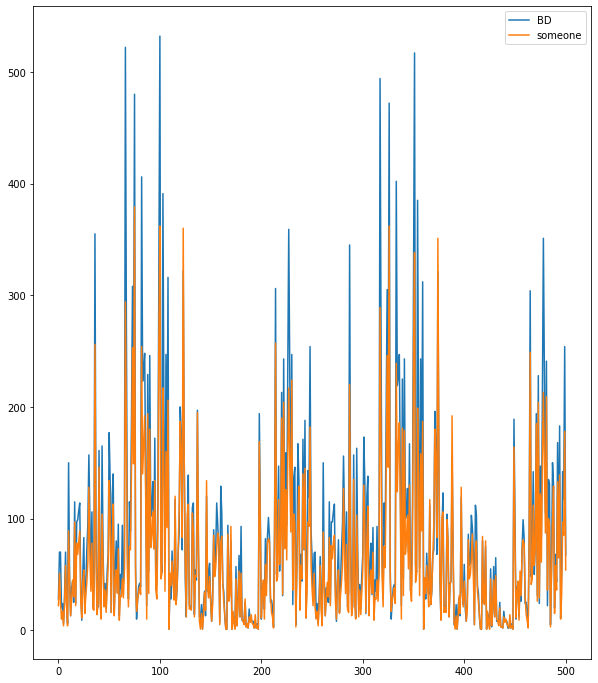

In [68]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(10, 12))

plt.plot(datest, label = my_handle)

plt.plot(datestp, label = sendert)
plt.legend()

In [ ]:
# Plotting the number of convos initiated by each user

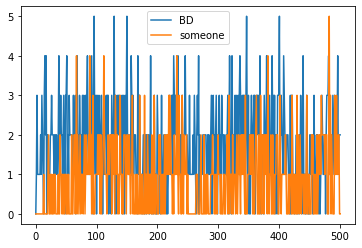

In [70]:
plt.plot(convoinitbyme, label = my_handle)
plt.plot(convoinitbythem, label = sendert)
plt.legend()

# Optional, but if you want to smooth the curves youve to download scipy

In [55]:
from scipy.ndimage.filters import gaussian_filter1d
import numpy as np
    
def smooth(y):
    ysmoothed = gaussian_filter1d(y, sigma=3)
    return ysmoothed

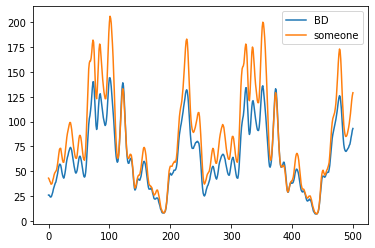

In [65]:
plot = smooth(datestp)
plt.plot(plot, label = my_handle)
plot = smooth(datest)
plt.plot(plot, label = sendert)
plt.legend()